# Kaggle Mercedes

### Packages

In [305]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [306]:
df = pd.read_csv('train.csv')
finalTest = pd.read_csv('test.csv')
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Exploratory Data Analysis

In [307]:
# print(df.shape)
X = df.drop(columns=["ID", "y"])
y = df["y"].values
print("Shape of X: " + str(X.shape) + ", Shape of y: " + str(y.shape))

Shape of X: (4209, 376), Shape of y: (4209,)


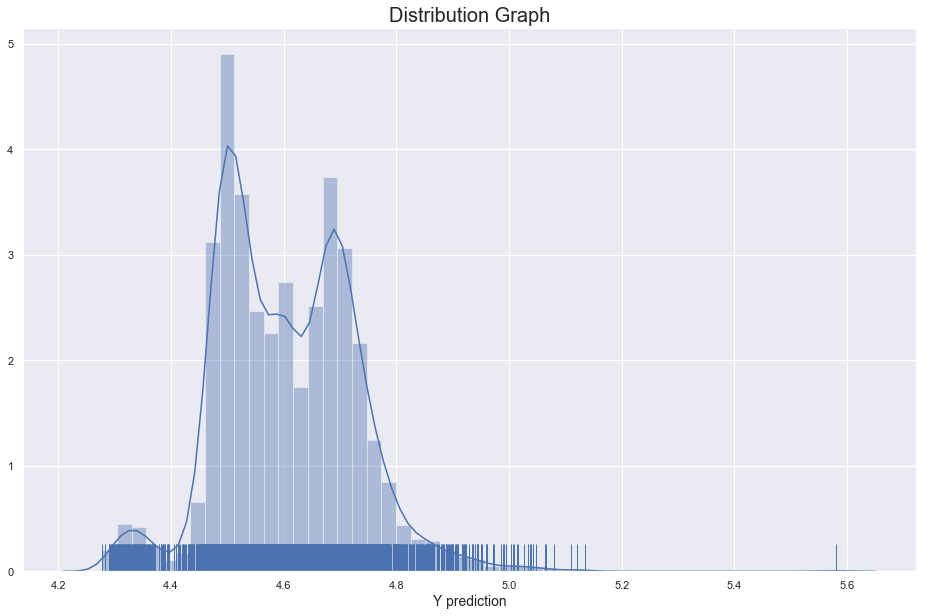

In [308]:
plt.figure(figsize=(16,10))
sns.distplot(np.log(df.y.values), kde=True, rug=True)
plt.xlabel('Y prediction', fontsize=14)
plt.title('Distribution Graph', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Distribution X2 with Y')

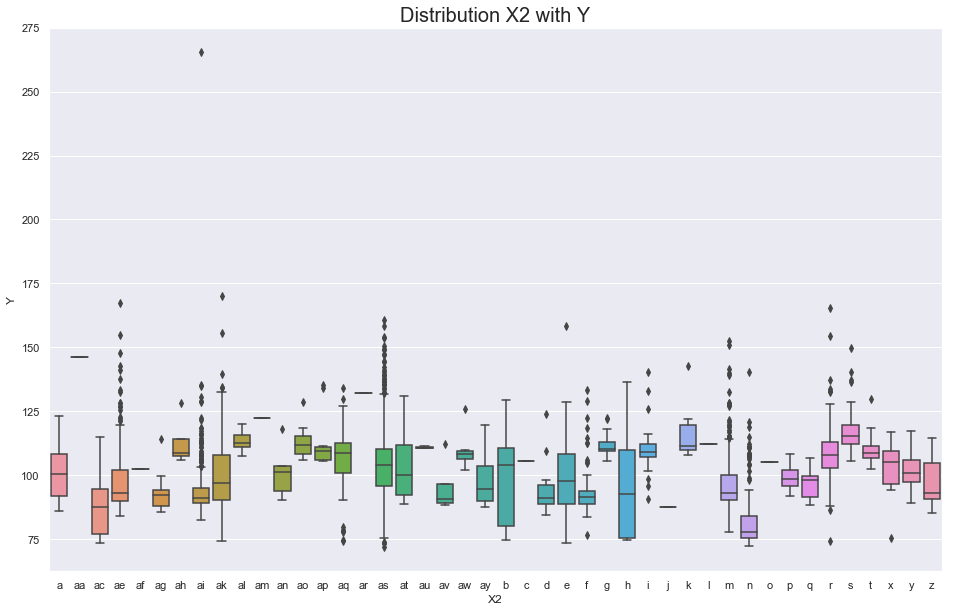

In [309]:
var_name = 'X2'
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.boxplot(x=var_name, y='y', data=df, order=col_order)
plt.ylabel("Y")
plt.xlabel("X2")
plt.title('Distribution X2 with Y', fontsize=20)

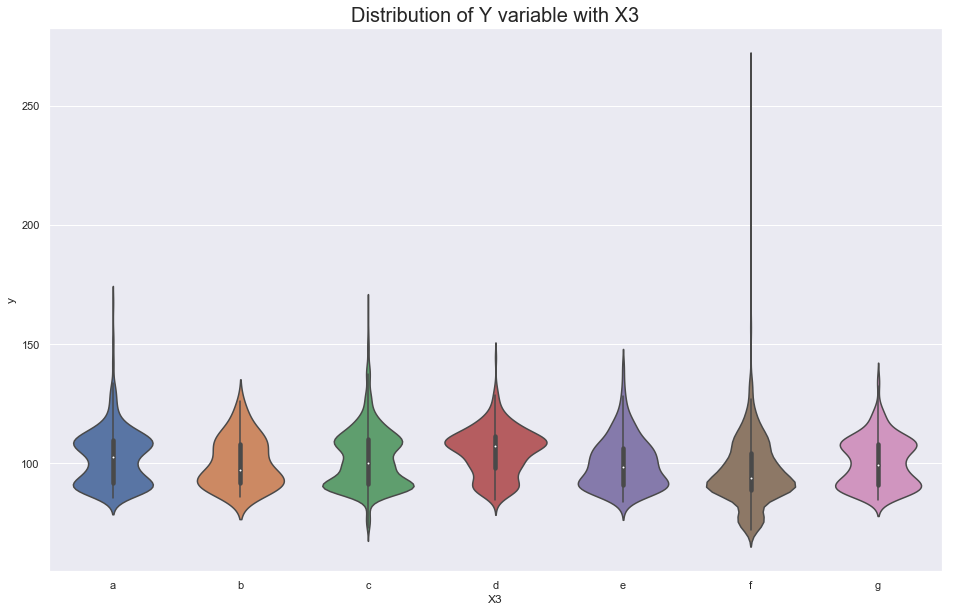

In [310]:
var_name = "X3"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.violinplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel('X3', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of Y variable with X3", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Distribution X5 with Y')

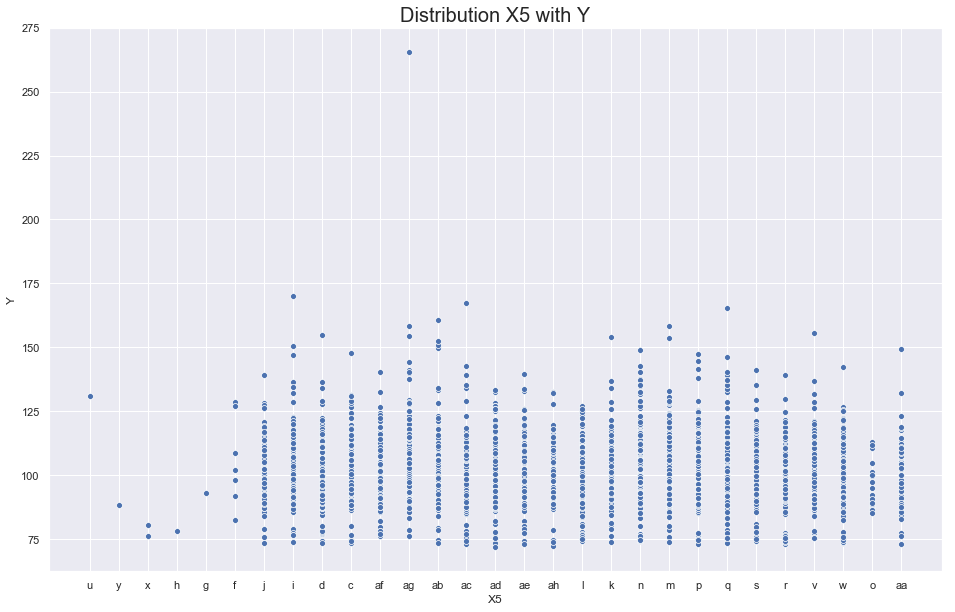

In [311]:
sns.set()
var_name = 'X5'
plt.figure(figsize=(16,10))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x= var_name, y='y', palette=cmap, sizes=(10, 200), data=df)
plt.xlabel('X5', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Distribution X5 with Y', fontsize=20)

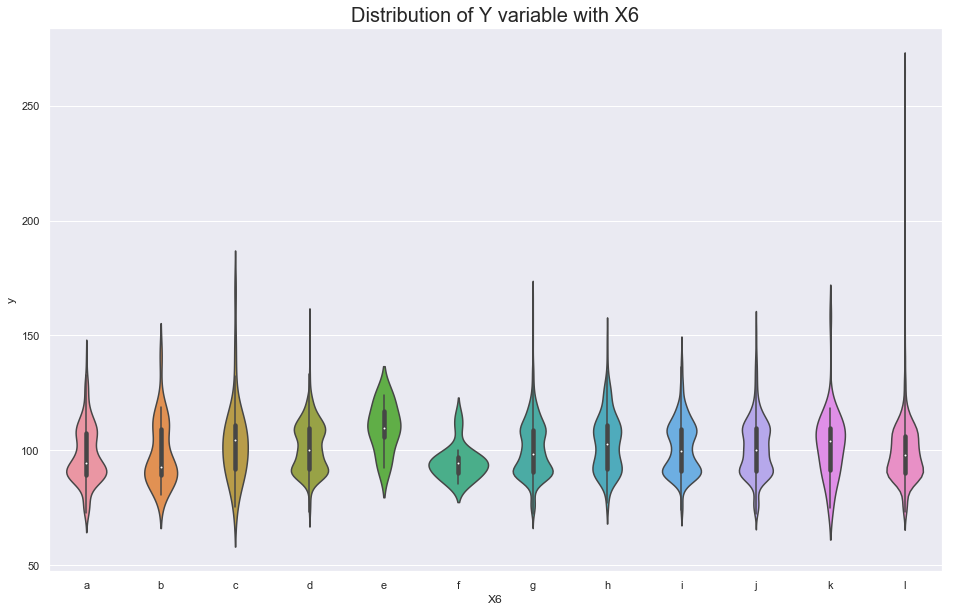

In [312]:
var_name = "X6"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.violinplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel('X6', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of Y variable with X6", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Distribution Y with X8')

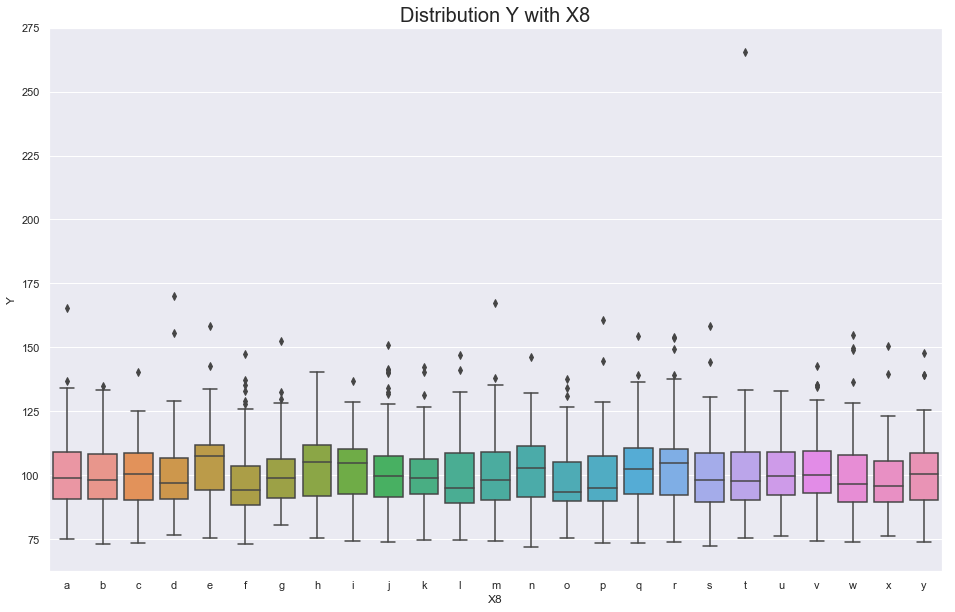

In [313]:
var_name = 'X8'
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.boxplot(x=var_name, y='y', data=df, order=col_order)
plt.ylabel("Y")
plt.xlabel("X8")
plt.title('Distribution Y with X8', fontsize=20)

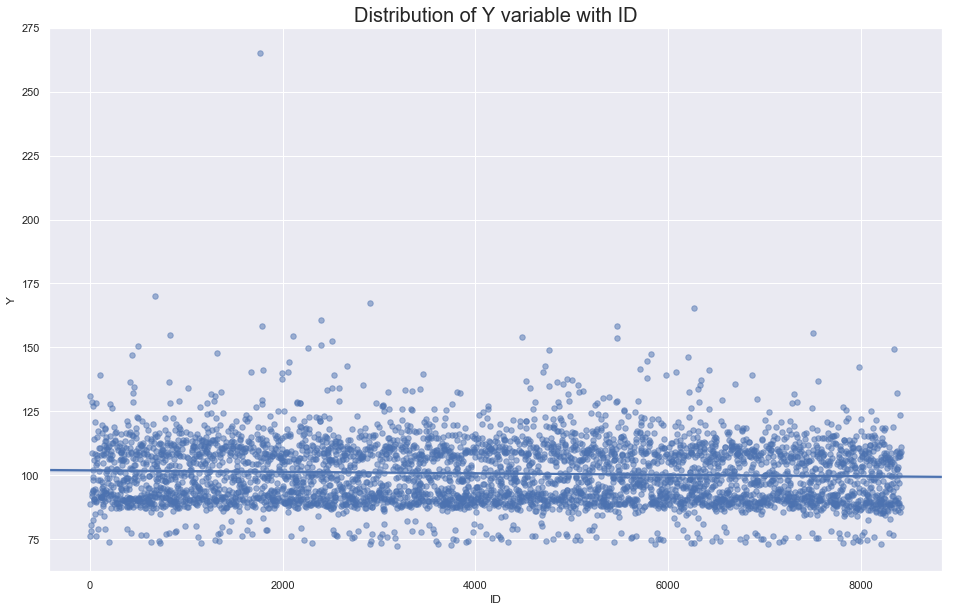

In [314]:
var_name = "ID"
plt.figure(figsize=(16,10))
sns.regplot(x=var_name, y='y', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel('ID', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title("Distribution of Y variable with ID", fontsize=20)
plt.show()

### Data Split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print("Shape of X_train =" + str(X_train.shape))
print("Shape of y_train ="+ str(y_train.shape))
print("Shape of X_test ="+ str(X_test.shape))
print("Shape of y_test =" +str(y_test.shape))

Shape of X_train =(2946, 376)
Shape of y_train =(2946,)
Shape of X_test =(1263, 376)
Shape of y_test =(1263,)


### One hot Encoder of Catagorical Variables

In [316]:
#create the dummies on the training data
X_train = pd.get_dummies(X_train)
#create the dummies in the new (unseen data)
X_test = pd.get_dummies(X_test)
#create the dummies for the final test
X_finalTest = pd.get_dummies(finalTest)

In [317]:
print(" Shape of X_train =" + str(X_train.shape))
print(" Shape of y_train ="+ str(y_train.shape))
print(" Shape of X_test ="+ str(X_test.shape))
print(" Shape of y_test =" +str(y_test.shape))
print(" Shape of FinalTest =" +str(X_finalTest.shape))

 Shape of X_train =(2946, 559)
 Shape of y_train =(2946,)
 Shape of X_test =(1263, 544)
 Shape of y_test =(1263,)
 Shape of FinalTest =(4209, 570)


In [318]:
#re-index the new data to the columns of the training data, filling the missing values with 0
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
X_finalTest = X_finalTest.reindex(columns = X_train.columns, fill_value=0)

In [319]:
X_finalTest.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [320]:
X_train.shape, X_test.shape, X_finalTest.shape

((2946, 559), (1263, 559), (4209, 559))

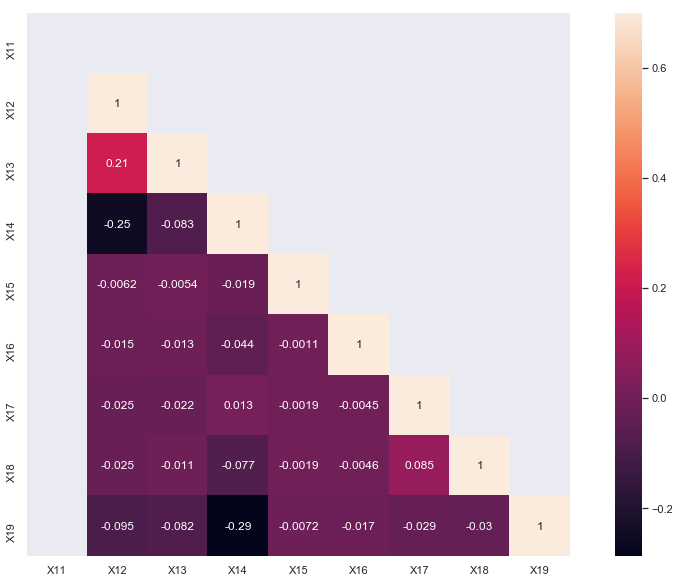

In [321]:
correlation_map = df[X_train.columns[1:10]].corr()

obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(16,10)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

## Model Random Forest Regressor

In [322]:
rf = RandomForestRegressor(random_state=42)

### GridSearchCV

In [323]:
print(X_train.shape, y_train.shape)
params = {
    'n_estimators': [1, 2, 10, 50, 100],
    'max_depth' : [5, 6, 7, 8, 9, 10, 11, 12]
}
rfcv = GridSearchCV(rf, params, scoring='neg_mean_squared_error', cv=10)
rfcv.fit(X_train, y_train)

(2946, 559) (2946,)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 10, 50, 100], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

#### best hyperparameters for RF

In [324]:
print(rfcv.best_params_)

{'max_depth': 5, 'n_estimators': 100}


### Predict

In [325]:
print(y_train)
y_train_hat = rfcv.predict(X_train)
print(y_train_hat)

[ 94.03  89.38 120.12 ...  97.99  90.09 103.03]
[ 94.17575624  94.72659519 113.61808835 ... 103.45130789  94.26504382
  93.98361062]


In [326]:
def rmse_custom(y, yhat):
    return(np.sqrt(np.mean((y - yhat)**2)))

In [327]:
rmse_custom(y_train, y_train_hat)

8.009746686727027

In [328]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_train, y_train_hat))

8.009746686727027

In [329]:
X_test.shape, y_test.shape

((1263, 559), (1263,))

In [330]:
y_test_hat = rfcv.predict(X_test)

In [331]:
np.sqrt(mean_squared_error(y_test, y_test_hat))

7.819213918375479

### Summarize the results of the grid search

In [332]:
print(rfcv.best_score_)
print(rfcv.best_estimator_)

-75.72627865556572
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


## Model Desicion Tree Regressor

In [333]:
clf = DecisionTreeRegressor()

### GridSearchCV

In [334]:
print(X_train.shape, y_train.shape)
params = {
    'max_depth' : [5, 6, 7, 8, 9, 10, 11, 12, 20, 50, 100]

}
clf = GridSearchCV(clf, params, scoring='neg_mean_squared_error', cv=10)
clf.fit(X_train, y_train)

(2946, 559) (2946,)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

### Summarize the results of the grid search

In [335]:
#print("Decision tree Prediction = "+ str(rfcv.predict(X_test)))

In [336]:
y_test_hat = clf.predict(X_test)

In [337]:
np.sqrt(mean_squared_error(y_test, y_test_hat))

7.967044982528736

In [338]:
print(clf.best_score_)
print(clf.best_estimator_)

-82.84333784179336
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


## Model LinearRegression

In [339]:
reg = LinearRegression()

### GridSearchCV

In [340]:
params = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'),'copy_X':('True', 'False')}
reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=10)
reg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': ('True', 'False'), 'normalize': ('True', 'False'), 'copy_X': ('True', 'False')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

### Summarize the results of the grid search

In [341]:
#print("Linear Regression prediction = " + str(reg.predict(X_test)))

In [342]:
y_test_hat = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_hat))

56251126979293.08

In [343]:
print(reg.best_score_)

-1.4453449629091722e+28


#### model is overfitting

## Model GradientBoostingRegressor

### Download package xgboost

In [344]:
!pip3 install xgboost

In [345]:
xgb = GradientBoostingRegressor(random_state=42)

### GridSearchCV

In [346]:
xgb_params= {'n_estimators':range(20,81,500)}
xgb = GridSearchCV(xgb, xgb_params, scoring='neg_mean_squared_error', cv=10)
xgb.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(20, 81, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

### Summarize the results of the grid search

In [347]:
y_test_hat = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_hat))

7.850032153156047

In [348]:
print(xgb.best_score_)

-75.39595239715086


## XGBOOST

In [349]:
import xgboost as xgb

In [350]:
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=500, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

# specify parameters via map
num_round = 2
bst = xgb.train(xgb_params, dtrain, num_round)

# make prediction
preds = bst.predict(dtest)

# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain)

[0]	train-rmse:100.52	test-rmse:100.518
[50]	train-rmse:78.4672	test-rmse:78.4712
[100]	train-rmse:61.3419	test-rmse:61.349
[150]	train-rmse:48.0684	test-rmse:48.0771
[200]	train-rmse:37.811	test-rmse:37.8227
[250]	train-rmse:29.9209	test-rmse:29.9416
[300]	train-rmse:23.8955	test-rmse:23.9286
[350]	train-rmse:19.3377	test-rmse:19.3891
[400]	train-rmse:15.9277	test-rmse:16.0161
[450]	train-rmse:13.4225	test-rmse:13.5627
[499]	train-rmse:11.6388	test-rmse:11.8602


### Predict

In [351]:
from sklearn.metrics import r2_score

# now fixed, correct calculation
print(r2_score(dtrain.get_label(), model.predict(dtrain)))

-55.00415641057405


In [352]:
print(r2_score(dtest.get_label(), model.predict(dtest)))

-60.145004954386195


In [353]:
dtest = xgb.DMatrix(X_test)
y_pred_test = model.predict(dtest)

### Final Test predict

In [354]:
Id_finalTest = finalTest['ID']

dfinalTest = xgb.DMatrix(X_finalTest)
y_pred_finalTest = model.predict(dfinalTest)

y_finalTest = pd.DataFrame({'ID': Id_finalTest, 'y': y_pred_finalTest})

In [355]:
y_finalTest.to_csv('xgboost-depth{}-gregoire.csv'.format(xgb_params['max_depth']), index=False)